In [3]:
## Import functions for Data Scraping, Treatment and Plotting

## System
import re
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

## EDA
import numpy as np
import pandas as pd

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


In [4]:
def BarplotMap(df, nome_col, value):
    g = sns.catplot(y=nome_col, x=value, col="Map",
                    data=df, kind="bar",
                    height=6, aspect=.8)

## MAP_W CORRELATION
def CorrPlotMap(df):
    for i, map in enumerate(team_stats.Map.unique()):
        filter = team_stats[team_stats['Map'] == map]
        corr_mapw = filter.corr()['MAP_WIN_RATE'][['ATK_ROUND_WIN_RATE','DEF_ROUND_WIN_RATE', 'ATK_START_RATE', 'DEF_START_RATE']].sort_values()
        plt.figure(i)
        sns.set(rc={'figure.figsize':(7,5)})
        sns.barplot(y=corr_mapw.index, x=corr_mapw.values, palette="Blues_d").set_title('Win Rate Correlation -- ' + map)

In [5]:
PATH = '../data/csv/team_stats.csv'
team_stats = pd.read_csv(PATH)

team_stats['ATK_START_RATE'] = round(team_stats['ATK_START'] / team_stats['MAP_COUNT'],2) * 100
team_stats['DEF_START_RATE'] = round(team_stats['DEF_START'] / team_stats['MAP_COUNT'],2) * 100

In [6]:
team_stats.head()

,Map,MAP_WIN_RATE,MAP_W,MAP_L,ATK_START,DEF_START,ATK_ROUND_WIN_RATE,ATK_ROUND_W,ATK_ROUND_L,DEF_ROUND_WIN_RATE,DEF_ROUND_W,DEF_ROUND_L,MAP_COUNT,ATK_ROUND_COUNT,DEF_ROUND_COUNT,ROUND_TOTAL_COUNT,TEAM,ATK_START_RATE,DEF_START_RATE
0,Bind,91,20,2,11,8,61,102,66,66,109,55,22,168,164,332,GAMELANDERS,50.0,36.0
1,Haven,73,8,3,3,6,69,60,27,50,48,48,11,87,96,183,GAMELANDERS,27.0,55.0
2,Split,86,12,2,8,6,55,76,63,63,76,45,14,139,121,260,GAMELANDERS,57.0,43.0
3,Ascent,81,21,5,13,13,51,135,128,64,183,104,26,263,287,550,GAMELANDERS,50.0,50.0
4,Icebox,100,1,0,1,0,58,7,5,86,6,1,1,12,7,19,GAMELANDERS,100.0,0.0


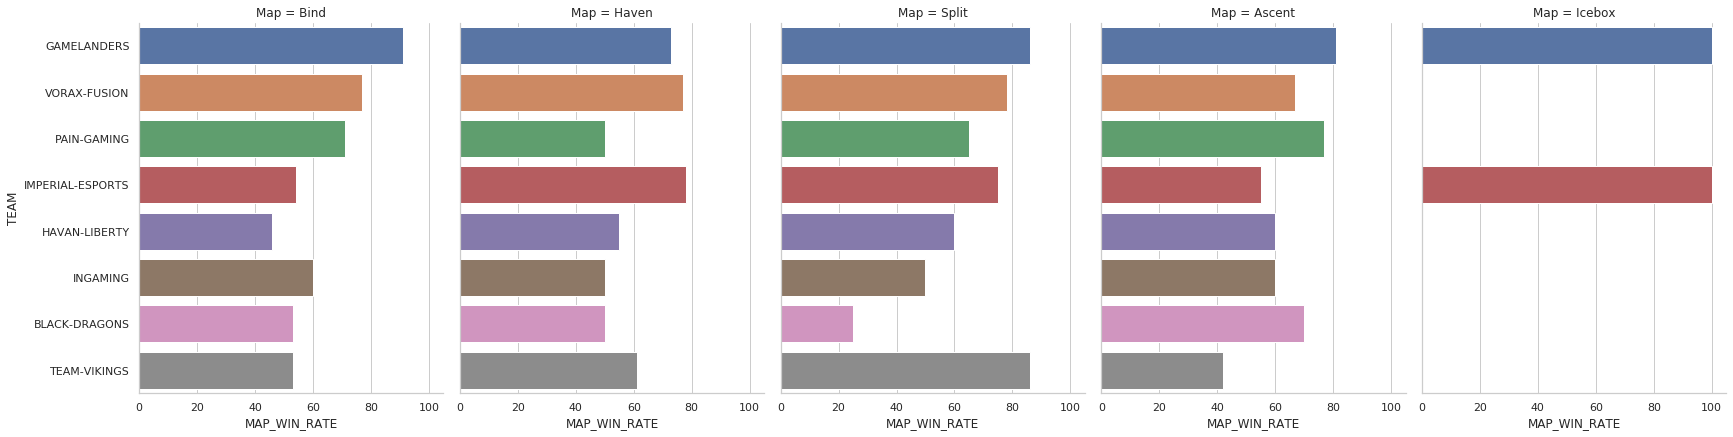

In [7]:
BarplotMap(team_stats,'TEAM', 'MAP_WIN_RATE')

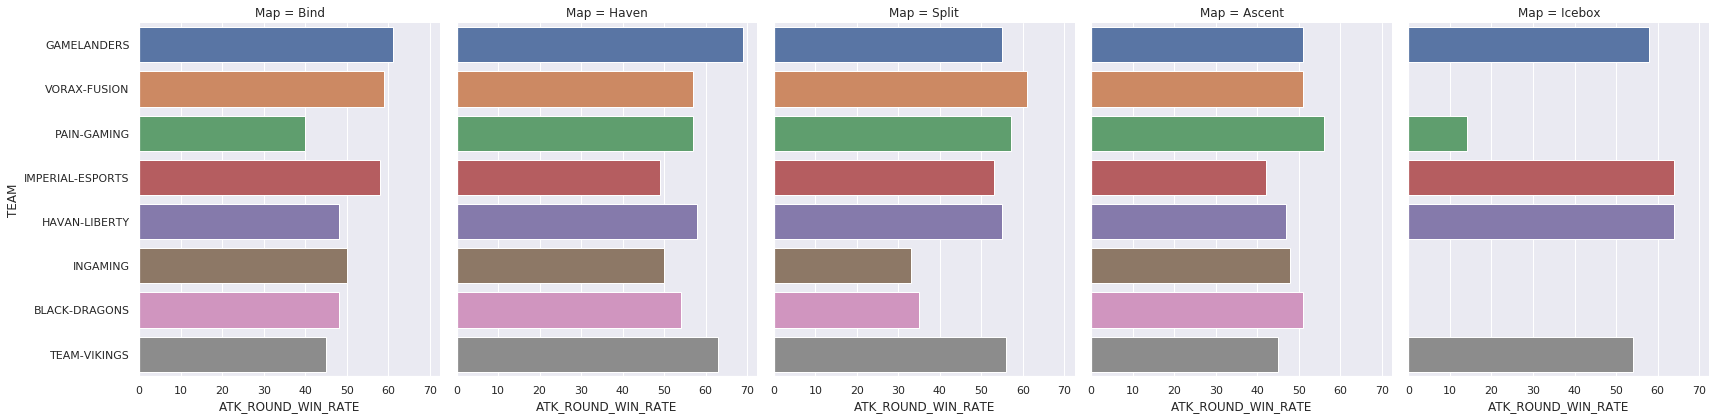

In [55]:
barplot(team_stats,'TEAM', 'ATK_ROUND_WIN_RATE')

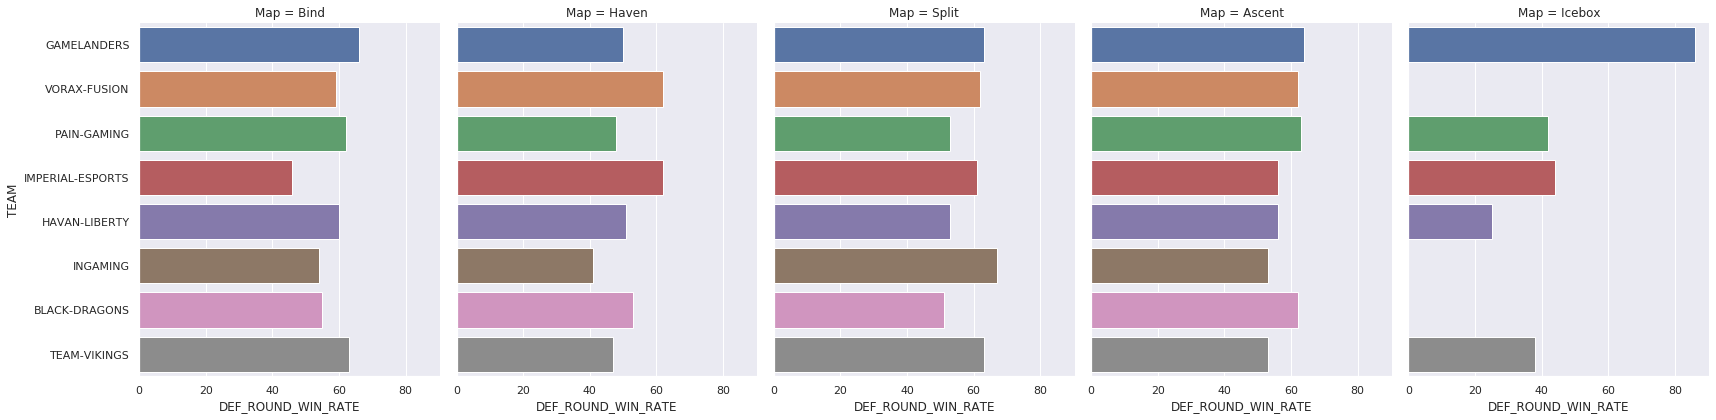

In [56]:
barplot(team_stats,'TEAM', 'DEF_ROUND_WIN_RATE')

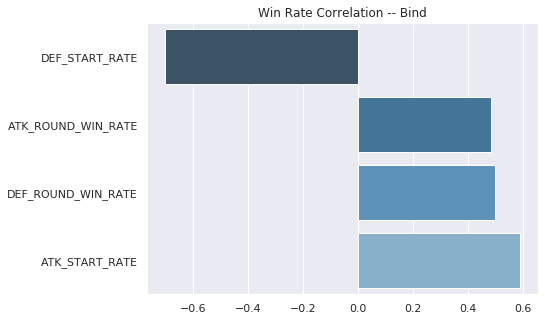

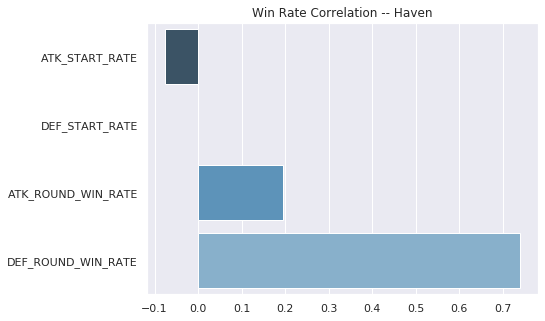

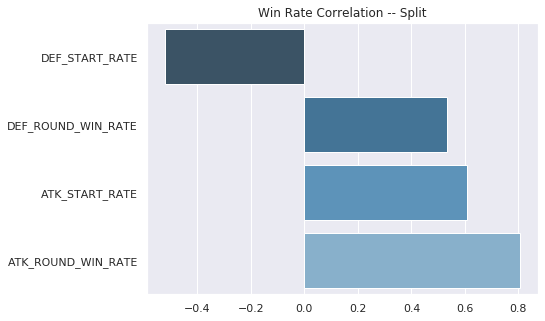

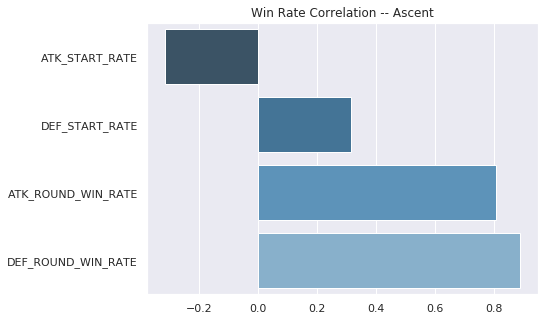

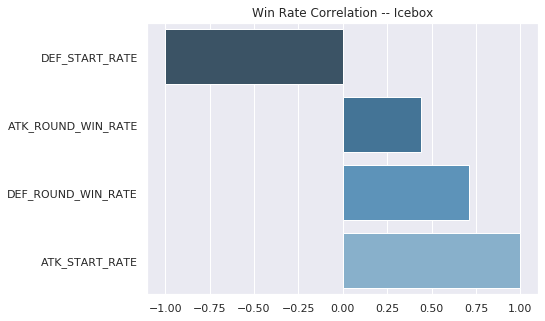

In [118]:
CorrPlotMap(team_stats)